<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/UTS%20Machine%20Learning/Google%20Colab/Nella_Aprilia_1103210185.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UTS MACHINE LEARNING

Nama : Nella Aprilia

NIM : 1103210185

Dataset : https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Model : Random Forest

**Menghubungkan GDrive ke GColab**

In [ ]:
# Modul untuk menghubungkan Google Drive dengan Colab.
from google.colab import drive

# Menghubungkan Google Drive dengan Colab.
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import Library**

In [ ]:
import numpy as np  # Import modul numpy sebagai np, modul ini sering digunakan untuk komputasi numerik.
import pandas as pd  # Import modul pandas sebagai pd, digunakan untuk manipulasi dan analisis data.
from sklearn.ensemble import RandomForestClassifier  # Import kelas RandomForestClassifier dari modul ensemble di scikit-learn, digunakan untuk pembelajaran dengan metode Random Forest.
from sklearn.neighbors import KNeighborsClassifier  # Import kelas KNeighborsClassifier dari modul neighbors di scikit-learn, digunakan untuk pembelajaran dengan metode k-Nearest Neighbors.
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error  # Import beberapa metrik evaluasi dari modul metrics di scikit-learn, digunakan untuk mengevaluasi performa model.
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import beberapa alat preprocessing dari modul preprocessing di scikit-learn, seperti StandardScaler untuk penskalaan fitur dan LabelEncoder untuk mengkodekan label kelas.
from sklearn.model_selection import train_test_split  # Import fungsi train_test_split dari modul model_selection di scikit-learn, digunakan untuk membagi data menjadi set pelatihan dan pengujian.




In [ ]:
# Membaca dataset
data_train = pd.read_csv("/content/gdrive/MyDrive/dataset uts ml/train.csv")

<ipython-input-106-800590836708>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/content/gdrive/MyDrive/dataset uts ml/train.csv")


In [ ]:
# Membaca seluruh DataFrame pada train
data_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
# Menampilkan beberapa baris terakhir dari DataFrame
data_train.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [ ]:
# Mengambil sampel dataframe secara acak sebanyak sembilan baris
data_train.sample(9)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
39873,0xffa3,CUS_0x1340,February,Matthewo,42,868-01-7823,Architect,40600.61,3420.384167,4,...,Good,1198.96,38.309970,20 Years and 9 Months,No,63.614852,135.31834936092554,High_spent_Medium_value_payments,393.1052157744249,Standard
97006,0x24e64,CUS_0x6a81,July,NaN,31,097-10-6675,_______,21403.175,1625.597917,5,...,Good,1348.1,33.955780,31 Years and 1 Months,No,0.000000,162.57381751959326,Low_spent_Small_value_payments,289.98597414707336,Standard
68700,0x1a88a,CUS_0x8bba,May,Rx,16,417-78-1654,Scientist,9429.325,909.777083,5,...,Standard,2101.94,25.509819,15 Years and 0 Months,Yes,12.851521,59.48942613105577,High_spent_Small_value_payments,278.6367614881694,Standard
74503,0x1ca89,CUS_0x8420,August,Pedrov,16,743-41-9460,Media_Manager,19930.93,1708.910833,7,...,_,4417.41_,36.655182,14 Years and 4 Months,Yes,56.856176,216.62057992114543,Low_spent_Small_value_payments,187.41432773455026,Poor
79074,0x1e554,CUS_0x542f,March,Carolei,49,904-67-1928,Lawyer,12763.795,1220.649583,8,...,Standard,1472.02,38.945486,28 Years and 7 Months,No,31.043071,93.53165901995376,Low_spent_Large_value_payments,267.49022873222975,Standard
2469,0x2477,CUS_0x98f9,June,da Costaa,34,704-68-7178,_______,15735.68,1043.306667,3,...,Standard,1574.91,28.911587,9 Years and 3 Months,Yes,21.356185,101.25552310290257,Low_spent_Small_value_payments,271.71895870981416,Standard
64915,0x1925d,CUS_0x5d50,April,Tricias,34,560-98-6722,Media_Manager,34486.08,2914.840000,5,...,Good,1423.18,26.567078,21 Years and 6 Months,No,67.972795,68.36674336868546,Low_spent_Large_value_payments,425.14446196074374,Standard
27354,0xb648,CUS_0x3911,March,Alwyn Scottj,22,518-73-3085,_______,61839.26,5162.271667,4,...,Good,1014.5,29.783562,23 Years and 0 Months,NM,0.000000,293.53247221521406,Low_spent_Large_value_payments,492.6946944514526,Good
63174,0x18828,CUS_0xb7bb,July,Michaelf,43,797-45-5985,Manager,118717.64,NaN,3,...,Standard,718.0,36.890945,26 Years and 4 Months,Yes,141.090800,531.7122831625111,Low_spent_Large_value_payments,585.7105832875915,Standard


In [ ]:
# Menampilkan 20 baris pertama pada data train
print(data_train.head(20))

        ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-

In [ ]:
# Mendapatkan daftar nama kolom dari DataFrame yang sedang dikerjakan.
data_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [ ]:
# Memulai untuk menganalisis atau memproses dataframe
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41267 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     41267 non-null  int64  
 1   Age                       41267 non-null  float64
 2   Occupation                41267 non-null  int64  
 3   Annual_Income             41267 non-null  float64
 4   Monthly_Inhand_Salary     41267 non-null  float64
 5   Num_Bank_Accounts         41267 non-null  float64
 6   Num_Credit_Card           41267 non-null  int64  
 7   Interest_Rate             41267 non-null  int64  
 8   Num_of_Loan               41267 non-null  float64
 9   Delay_from_due_date       41267 non-null  float64
 10  Num_of_Delayed_Payment    41267 non-null  float64
 11  Changed_Credit_Limit      41267 non-null  float64
 12  Num_Credit_Inquiries      41267 non-null  float64
 13  Credit_Mix                41267 non-null  int64  
 14  Outstanding

In [ ]:
# Membuat DataFrame baru bernama 'dtypes' untuk menyimpan tipe data dari setiap kolom dalam DataFrame 'data_train'.
dtypes = pd.DataFrame(data_train.dtypes, columns=['dtypes'])

# Menampilkan DataFrame 'dtypes' yang berisi tipe data dari setiap kolom dalam DataFrame 'data_train'.
dtypes


,dtypes
Month,int64
Age,float64
Occupation,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Delay_from_due_date,float64


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('dtypes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Menghasilkan ringkasan statistik dari kolom-kolom dengan tipe data objek dalam DataFrame train_frame,
# dengan hasil yang ditranspose agar lebih mudah dibaca.
train_frame.describe(include='object').T


,count,unique,top,freq
Month,100000,8,January,12500
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24
Payment_of_Min_Amount,100000,3,Yes,52326


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# menghapus kolom-kolom yang tidak diperlukan dan melihat deskripsi statistik dari data yang tersisa,
# kode tersebut membantu dalam memahami struktur dan karakteristik data yang akan digunakan untuk analisis atau pemodelan lebih lanjut.
cols_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age', 'Type_of_Loan']
data_train.drop(columns=cols_to_drop, inplace=True)
data_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
# Menampilkan informasi dapat memberikan pemahaman yang baik tentang distribusi nilai dalam kolom 'Monthly_Balance',
# yang bisa membantu dalam pemrosesan dan pemahaman lebih lanjut tentang data.
print(data_train['Monthly_Balance'].value_counts())

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: count, Length: 98792, dtype: int64


In [ ]:
# @title Data Frame Train Preprocess
# Bagian ini menghapus underscore ('_') dari semua nilai string dalam DataFrame data_train.
data_train = data_train.applymap(lambda x: x.replace('_', '') if isinstance(x, str) else x)

# Bagian ini melakukan encoding kategori (categorical encoding)
#untuk kolom-kolom tertentu dalam DataFrame data_train menggunakan LabelEncoder dari scikit-learn.
categorical = ['Month',"Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]
label_encoder = LabelEncoder()
for x in categorical:
    data_train[x] = label_encoder.fit_transform(data_train[x])

# Menghilangkan nilai negatif dari kolom-kolom numerik dalam DataFrame data_train
# Mengonversi semua nilai ke tipe numerik dengan pd.to_numeric
# Mengabaikan nilai-nilai yang tidak valid. Kemudian, menggunakan applymap
# Nilai yang negatif diubah menjadi None, baris yang menghasilkan nilai None maka akan dihapus dengan dropna.
data_train = data_train.apply(pd.to_numeric,errors='coerce')
data_train = data_train.applymap(lambda x: x if x >= 0 else None)
data_train.dropna(axis=0,inplace=True)

In [ ]:
# menghitung kuartil pertama (25%) dan kuartil ketiga (75%)
# untuk setiap fitur dalam DataFrame data_train menggunakan metode quantile().
quartiles1 = data_train.quantile([0.25, 0.75])

# menghitung Rentang Interkuartil (IQR) untuk setiap fitur.
# IQR dihitung sebagai selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1) dari setiap fitur.
IQR1 = quartiles1.loc[0.75] - quartiles1.loc[0.25]

# mendefinisikan batas bawah dan batas atas untuk setiap fitur.
# Batas bawah dihitung sebagai Q1 dikurangi dengan 1.5 kali IQR, sedangkan batas atas dihitung sebagai Q3 ditambah dengan 1.5 kali IQR.
# Hasilnya disimpan dalam bentuk kamus Python menggunakan metode to_dict()
lower_bound1 = (quartiles1.loc[0.25] - 1.5 * IQR1).to_dict()
upper_bound1 = (quartiles1.loc[0.75] + 1.5 * IQR1).to_dict()

In [ ]:
# Dengan menghitung kuartil dan IQR serta menentukan batas bawah dan batas atas
# Kemudian dapat mengidentifikasi titik-titik data yang dianggap sebagai pencilan (outliers) dalam setiap fitur.filtered_data1 = data_train.copy()
for feature in data_train.columns:
    lower_bound_value1 = lower_bound1[feature]
    upper_bound_value1 = upper_bound1[feature]
    filtered_data1 = filtered_data1[(filtered_data1[feature] >= lower_bound_value1) & (filtered_data1[feature] <= upper_bound_value1)]
data_train = filtered_data1

In [ ]:
# Memilih fitur-fitur yang bukan tipe data integer untuk data train
X_train = data_train.drop('Credit_Score',axis=1)  # X_train akan berisi semua fitur kecuali 'Credit_Score'
y_train = data_train['Credit_Score']  # y_train akan berisi label 'Credit_Score'

# Membagi data train menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)  # Membagi X_train dan y_train menjadi data latih dan data validasi dengan ukuran data validasi sebesar 10%

# Membuat Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Membuat objek model Random Forest dengan 100 pohon keputusan

# Melatih model Random Forest menggunakan data latih
rf_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model Random Forest pada data validasi
y_pred_valid_rf = rf_model.predict(X_valid)


In [ ]:
# @title Mengevaluasi MSE dan RMSE
# Menghitung akurasi model dengan membandingkan label yang diprediksi (y_pred_valid_rf) dengan label yang sebenarnya (y_valid).
accuracy = accuracy_score(y_valid, y_pred_valid_rf)

# Menampilkan akurasi model.
print("Accuracy:", accuracy)

# # Menghitung akurasi model dengan membandingkan label yang diprediksi (y_pred_valid_rf) dengan label yang sebenarnya (y_valid).
accuracy = accuracy_score(y_valid, y_pred_valid_rf)

# Menampilkan akurasi model.
print("Accuracy:", accuracy)

# Menghitung mean squared error (MSE) antara label yang diprediksi (y_pred_valid_rf) dan label yang sebenarnya (y_valid).
mse = mean_squared_error(y_valid, y_pred_valid_rf)

# Menampilkan MSE.
print("Mean Squared Error (MSE):", mse)

# Menghitung mean absolute error (MAE) antara label yang diprediksi (y_pred_valid_rf) dan label yang sebenarnya (y_valid).
mae = mean_absolute_error(y_valid, y_pred_valid_rf)

# Menampilkan MAE.
print("Mean Absolute Error (MAE):", mae)


Accuracy: 0.7950084807366126
Accuracy: 0.7950084807366126
Mean Squared Error (MSE): 0.4521444148291737
Mean Absolute Error (MAE): 0.28737581778531623


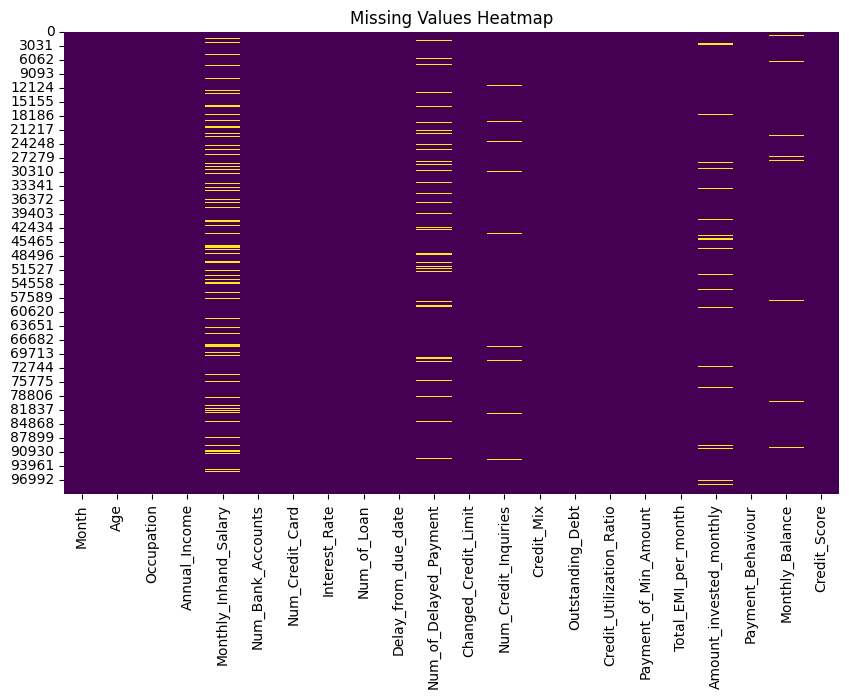

In [ ]:
# @title Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_frame.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()